# EC7212 – Computer Vision and Image Processing

#### Take Home Assignment 1

## EG/2020/4111 - Perera G.A.L.S.

#### [GitHub Repository](https://github.com/lasith54/Computer_Vision_TakeHome_02.git)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import filters
import os
from collections import deque

# Create results folder
os.makedirs('../results', exist_ok=True)
print("Results folder created successfully!")

Results folder created successfully!


## Task 1

In [10]:
def create_synthetic_image(size=(100, 100)):
    """
    Create a synthetic image 
    """
    img = np.zeros(size, dtype=np.uint8)
    
    # Background: pixel value 50
    img[:, :] = 50
    
    # Object 1: Circle in upper left, pixel value 120
    center1 = (25, 25)
    radius1 = 15
    y1, x1 = np.ogrid[:size[0], :size[1]]
    mask1 = (x1 - center1[0])**2 + (y1 - center1[1])**2 <= radius1**2
    img[mask1] = 120
    
    # Object 2: Rectangle in lower right, pixel value 200
    img[60:85, 60:85] = 200
    
    return img

In [11]:

def add_gaussian_noise(image, mean=0, std=20):
    noise = np.random.normal(mean, std, image.shape)
    noisy_img = image + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

In [12]:
def apply_otsu_threshold(image):
    # OpenCV method
    _, thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Skimage method
    otsu_thresh = filters.threshold_otsu(image)
    binary_img = (image > otsu_thresh).astype(np.uint8) * 255

    return thresh_img, binary_img, otsu_thresh

In [13]:

original_img = create_synthetic_image()
noisy_img = add_gaussian_noise(original_img)
otsu_cv, otsu_sk, threshold_value = apply_otsu_threshold(noisy_img)

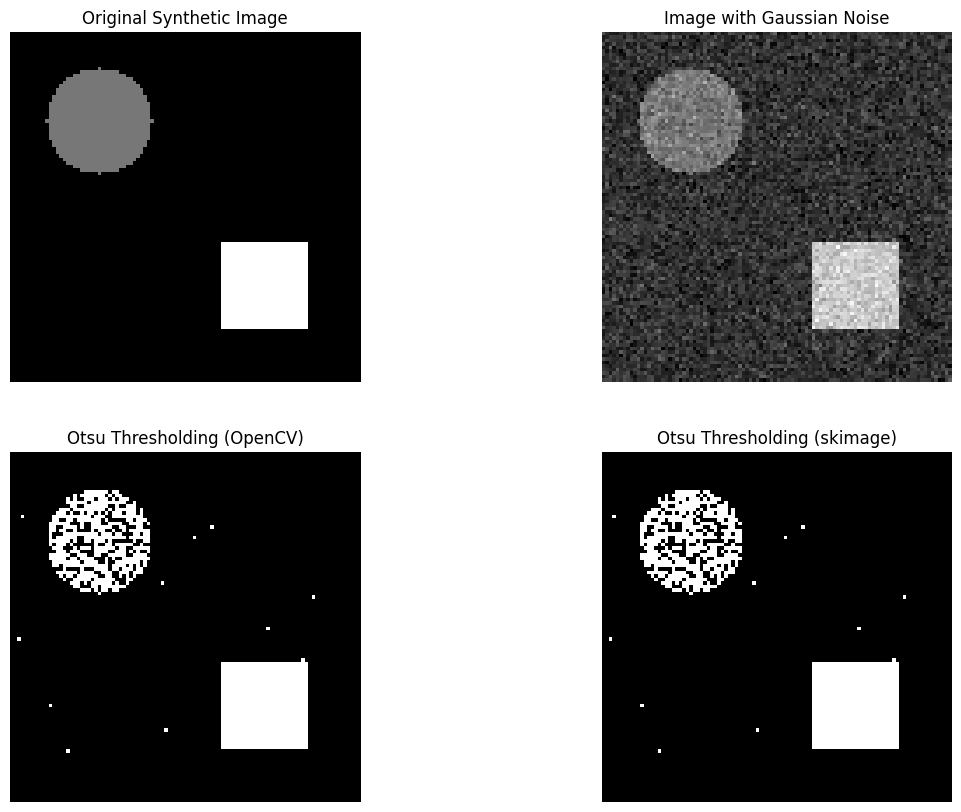

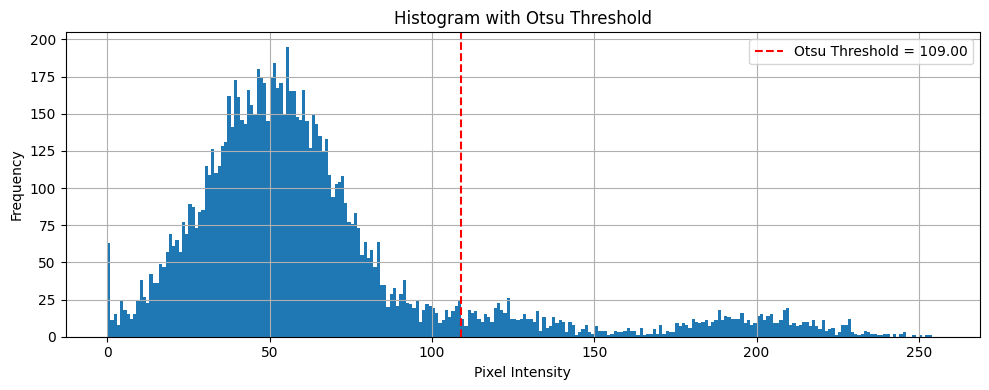

In [14]:
plt.figure(figsize=(14, 10))

# Row 1: image comparisons
plt.subplot(2, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original Synthetic Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')

# Row 2: binary results
plt.subplot(2, 2, 3)
plt.imshow(otsu_cv, cmap='gray')
plt.title("Otsu Thresholding (OpenCV)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(otsu_sk, cmap='gray')
plt.title("Otsu Thresholding (skimage)")
plt.axis('off')

In [15]:
result_dir = os.path.join("..", "results", "task_01")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "01_original_synthetic.jpg"), original_img)
cv2.imwrite(os.path.join(result_dir, "02_gaussian_noise.jpg"), noisy_img)
cv2.imwrite(os.path.join(result_dir, "03_otsu_opencv.jpg"), otsu_cv)
cv2.imwrite(os.path.join(result_dir, "04_otsu_skimage.jpg"), otsu_sk)

True

## Task 2

In [28]:
img_path = os.path.join("..", "input", "data.jpg")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
height, width = img.shape 
print(f"Image dimensions: Width = {width} px, Height = {height} px")

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

Image dimensions: Width = 1592 px, Height = 1080 px


In [29]:
def region_growing(image, seed, threshold=20):
    h, w = image.shape
    visited = np.zeros_like(image, dtype=np.uint8)
    region = np.zeros_like(image, dtype=np.uint8)

    seed_val = int(image[seed])
    queue = deque([seed])
    visited[seed] = 1
    region[seed] = 255

    while queue:
        y, x = queue.popleft()
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                ny, nx = y + dy, x + dx
                if 0 <= ny < h and 0 <= nx < w and not visited[ny, nx]:
                    pixel_val = int(image[ny, nx])
                    if abs(pixel_val - seed_val) <= threshold:
                        queue.append((ny, nx))
                        visited[ny, nx] = 1
                        region[ny, nx] = 255

    return region

In [38]:
# Choose a seed point inside object
seed_point = (1000, 1000) 

# Run region growing
segmented = region_growing(img, seed=seed_point, threshold=25)

In [39]:
seed_y, seed_x = seed_point          

seed_val = img[seed_y, seed_x]
print(f"Seed pixel value @ {seed_point}: {seed_val}")

Seed pixel value @ (1000, 1000): 65


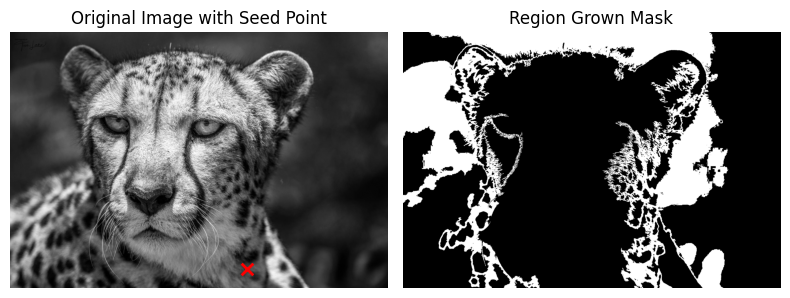

In [40]:

plt.figure(figsize=(8, 4))

# Original with seed mark
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.scatter(seed_x, seed_y,       
            c='red', s=70, marker='x', linewidths=2)
plt.title("Original Image with Seed Point")
plt.axis('off')

# Grown mask
plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Region Grown Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
result_dir = os.path.join("..", "results", "task_02")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "region_growing.jpg"), segmented)

True